In [23]:
pip install darts

In [24]:
pip install -U optuna

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import (
    Scaler,
    MissingValuesFiller,
    Mapper,
    InvertibleMapper,
    Diff
)
from darts.dataprocessing import Pipeline
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.timeseries_generation import linear_timeseries
from darts.datasets import MonthlyMilkDataset, MonthlyMilkIncompleteDataset


import optuna
from optuna.integration import PyTorchLightningPruningCallback
from optuna.visualization import (
    plot_optimization_history,
    plot_contour,
    plot_param_importances,
)
import torch
import random


from tqdm.notebook import tqdm
from pytorch_lightning.callbacks import Callback, EarlyStopping
from sklearn.preprocessing import MaxAbsScaler

from darts.datasets import ElectricityDataset
from darts.models import TCNModel, LinearRegressionModel,ARIMA

from darts.metrics import smape,rmse
from darts.utils.likelihood_models import GaussianLikelihood


import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

<Axes: xlabel='Month'>

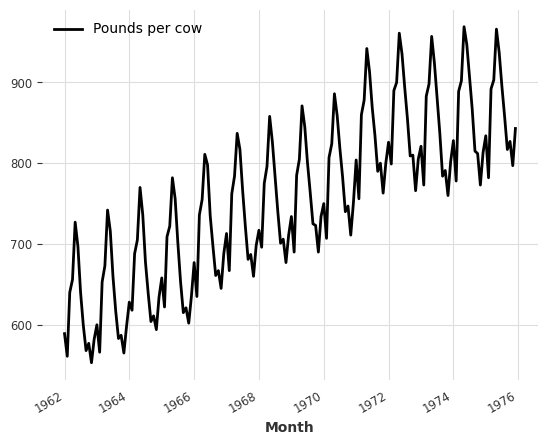

In [26]:
series = MonthlyMilkDataset().load()


series.plot()

In [27]:



diff = Diff(lags=1)

series_diff = diff.fit_transform(series)


cut_off = np.int(np.round(len(series_diff)*.8))

train,test =  series_diff[:cut_off],series_diff[cut_off:]


In [15]:
test_unscaled = scaler.inverse_transform(test)

In [28]:
def rmse_objective_unscale(trial):

   p_ranges = trial.suggest_int("p", 0, 10),
   q_ranges = trial.suggest_int("q", 0, 10)



   model =  ARIMA(trend="t",
                  d=1,
                    p = p_ranges,
                    q=q_ranges


                    )

   model.fit(series=train)

   preds = model.predict(series=train, n=len(test))



   smapes = rmse(test, preds, n_jobs=-1, verbose=True)
   smape_val = np.mean(smapes)
   print(smapes)

   return smape_val if smape_val != np.nan else float("inf")



In [29]:
def print_callback(study, trial):
    print(f"Current value: {trial.value}, Current params: {trial.params}")
    print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")

In [30]:
study = optuna.create_study(direction="minimize")

study.optimize(rmse_objective_unscale,n_trials=200)

100%|██████████| 1/1 [00:00<00:00, 238.22it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 574.56it/s]


46.60087472748722


100%|██████████| 1/1 [00:00<00:00, 229.64it/s]


51.06847799545464


100%|██████████| 1/1 [00:00<00:00, 248.52it/s]


49.44878433045367


100%|██████████| 1/1 [00:00<00:00, 251.13it/s]


47.75819334580917


100%|██████████| 1/1 [00:00<00:00, 174.00it/s]


46.483979468460696


100%|██████████| 1/1 [00:00<00:00, 262.70it/s]


52.953755288453756


100%|██████████| 1/1 [00:00<00:00, 327.22it/s]


59.060909544331786


100%|██████████| 1/1 [00:00<00:00, 574.96it/s]


45.922768803156224


100%|██████████| 1/1 [00:00<00:00, 389.26it/s]


56.870235811563944


100%|██████████| 1/1 [00:00<00:00, 441.88it/s]


137.35987936144198


100%|██████████| 1/1 [00:00<00:00, 589.00it/s]


46.11862323086552


100%|██████████| 1/1 [00:00<00:00, 653.83it/s]


49.20336290354155


100%|██████████| 1/1 [00:00<00:00, 578.84it/s]


46.58572444210113


100%|██████████| 1/1 [00:00<00:00, 618.63it/s]


50.49053075732991


100%|██████████| 1/1 [00:00<00:00, 628.64it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 580.85it/s]


49.91838402251864


100%|██████████| 1/1 [00:00<00:00, 682.67it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 664.71it/s]


80.51502606588366


100%|██████████| 1/1 [00:00<00:00, 314.98it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 745.79it/s]


166.2226475359574


100%|██████████| 1/1 [00:00<00:00, 539.81it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 330.18it/s]


141.99573272953756


100%|██████████| 1/1 [00:00<00:00, 550.29it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 585.63it/s]


48.696508090184174


100%|██████████| 1/1 [00:00<00:00, 883.94it/s]


166.2226475359574


100%|██████████| 1/1 [00:00<00:00, 857.38it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 642.21it/s]


46.9509363342175


100%|██████████| 1/1 [00:00<00:00, 90.96it/s]


166.2226475359574


100%|██████████| 1/1 [00:00<00:00, 627.33it/s]


48.290385189133474


100%|██████████| 1/1 [00:00<00:00, 375.63it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 562.47it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 918.59it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 205.54it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 886.18it/s]


76.42892535698616


100%|██████████| 1/1 [00:00<00:00, 563.67it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 213.70it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 775.86it/s]


48.696508090184174


100%|██████████| 1/1 [00:00<00:00, 501.71it/s]


49.5895698727049


100%|██████████| 1/1 [00:00<00:00, 602.72it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 623.04it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 647.07it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 216.57it/s]


80.51502606588366


100%|██████████| 1/1 [00:00<00:00, 788.11it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 414.01it/s]


76.42892535698616


100%|██████████| 1/1 [00:00<00:00, 416.76it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 151.52it/s]


59.060909544331786


100%|██████████| 1/1 [00:00<00:00, 551.66it/s]


51.71860955561016


100%|██████████| 1/1 [00:00<00:00, 341.50it/s]


47.426156502058696


100%|██████████| 1/1 [00:00<00:00, 356.48it/s]


46.330348139099776


100%|██████████| 1/1 [00:00<00:00, 270.71it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 724.66it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 474.09it/s]


56.870235811563944


100%|██████████| 1/1 [00:00<00:00, 825.00it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 452.75it/s]


80.51502606588366


100%|██████████| 1/1 [00:00<00:00, 564.89it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 540.22it/s]


50.37138074606514


100%|██████████| 1/1 [00:00<00:00, 404.66it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 499.08it/s]


141.99573272953756


100%|██████████| 1/1 [00:00<00:00, 480.56it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 876.92it/s]


50.49053075732991


100%|██████████| 1/1 [00:00<00:00, 523.96it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 524.75it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 562.62it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 700.80it/s]


80.51502606588366


100%|██████████| 1/1 [00:00<00:00, 517.75it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 534.58it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 445.82it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 815.06it/s]


166.2226475359574


100%|██████████| 1/1 [00:00<00:00, 538.21it/s]


56.870235811563944


100%|██████████| 1/1 [00:00<00:00, 585.63it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 527.52it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 541.62it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 528.98it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 213.08it/s]


56.870235811563944


100%|██████████| 1/1 [00:00<00:00, 603.24it/s]


141.99573272953756


100%|██████████| 1/1 [00:00<00:00, 758.05it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 769.74it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 573.85it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 563.22it/s]


47.827231858223335


100%|██████████| 1/1 [00:00<00:00, 485.62it/s]


94.74382512319261


100%|██████████| 1/1 [00:00<00:00, 557.53it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 788.11it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 806.75it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 363.46it/s]


52.913912797254106


100%|██████████| 1/1 [00:00<00:00, 813.80it/s]


49.91838402251864


100%|██████████| 1/1 [00:00<00:00, 838.53it/s]


27.47207455355282


100%|██████████| 1/1 [00:00<00:00, 216.12it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 635.98it/s]


33.919280035967645


100%|██████████| 1/1 [00:00<00:00, 703.98it/s]


76.42892535698616


100%|██████████| 1/1 [00:00<00:00, 726.79it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 826.30it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 438.87it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 500.27it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 507.85it/s]


48.290385189133474


100%|██████████| 1/1 [00:00<00:00, 130.25it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 781.06it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 715.87it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 786.92it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 897.37it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 490.33it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 161.90it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 803.97it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 820.32it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 537.46it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 835.85it/s]


47.51583203041383


100%|██████████| 1/1 [00:00<00:00, 608.84it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 436.36it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 562.16it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 107.83it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 262.01it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 720.05it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 827.28it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 825.81it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 746.18it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 548.99it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 568.87it/s]


36.690914985972015


100%|██████████| 1/1 [00:00<00:00, 141.84it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 188.17it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 304.20it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 337.73it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 330.05it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 527.06it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 722.78it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 519.03it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 587.68it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 511.44it/s]


44.917951559952385


100%|██████████| 1/1 [00:00<00:00, 590.58it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 337.92it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 334.71it/s]


48.290385189133474


100%|██████████| 1/1 [00:00<00:00, 259.34it/s]


48.290385189133474


100%|██████████| 1/1 [00:00<00:00, 526.59it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 604.72it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 623.32it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 244.48it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 192.08it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 347.07it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 354.22it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 554.51it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 579.96it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 567.10it/s]


49.91838402251864


100%|██████████| 1/1 [00:00<00:00, 324.76it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 268.62it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 303.28it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 141.30it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 212.52it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 487.65it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 124.45it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 485.00it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 184.53it/s]


49.91838402251864


100%|██████████| 1/1 [00:00<00:00, 547.85it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 201.69it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 574.01it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 782.52it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 506.93it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 206.46it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 691.67it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 139.57it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 573.46it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 528.38it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 226.33it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 103.82it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 724.66it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 717.71it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 877.29it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 324.56it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 229.45it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 457.59it/s]


35.05659498719591


100%|██████████| 1/1 [00:00<00:00, 695.80it/s]


36.69612614094001


100%|██████████| 1/1 [00:00<00:00, 706.47it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 477.44it/s]


45.38473196961335


100%|██████████| 1/1 [00:00<00:00, 128.08it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 246.40it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 161.05it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 800.13it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 750.99it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 450.85it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 865.16it/s]


49.250957657051565


100%|██████████| 1/1 [00:00<00:00, 571.20it/s]


44.76292103107474


100%|██████████| 1/1 [00:00<00:00, 848.02it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 134.97it/s]


61.79477375136639


100%|██████████| 1/1 [00:00<00:00, 230.70it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 857.73it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 563.67it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 828.75it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 979.75it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 433.83it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 187.20it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 565.96it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 797.09it/s]


49.91838402251864


100%|██████████| 1/1 [00:00<00:00, 844.43it/s]


45.60622565049191


100%|██████████| 1/1 [00:00<00:00, 351.58it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 328.42it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 794.07it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 597.91it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 558.72it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 606.55it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 527.39it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 615.36it/s]


23.338937363800042


100%|██████████| 1/1 [00:00<00:00, 578.05it/s]

35.05659498719591


In [31]:
print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")

Best value: 23.338937363800042, Best params: {'p': 6, 'q': 7}


In [32]:
model =  ARIMA(trend="t",
               d=1,
                    p =6,
                    q=7


                    )

model.fit(series=train)

preds = model.predict(series=train, n=len(test))



<Axes: xlabel='Month'>

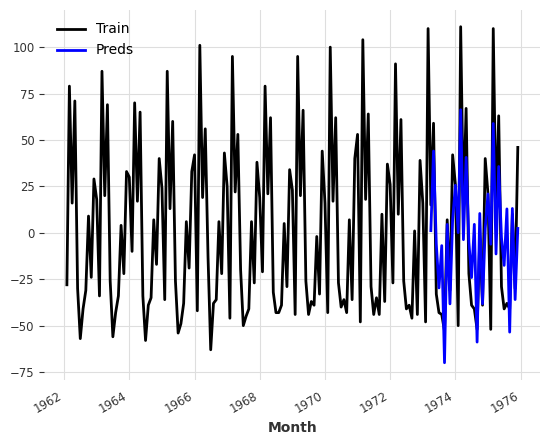

In [33]:
series_diff.plot(label='Train',color='black')

preds.plot(label='Preds',color='blue')

In [41]:
from darts import concatenate

train_pd = train.pd_dataframe()
preds_pd = preds.pd_dataframe()
preds_df = pd.concat([train_pd,preds_pd])
preds_df

component,Pounds per cow
Month,
1962-02-01,-28.000000
1962-03-01,79.000000
1962-04-01,16.000000
1962-05-01,71.000000
1962-06-01,-30.000000
...,...
1975-08-01,12.866061
1975-09-01,-53.496713
1975-10-01,13.106085


In [44]:
preds_ts = TimeSeries.from_dataframe(preds_df)

In [48]:
preds_undiff_df = diff.inverse_transform(preds_ts)

In [47]:
len(preds)

33

In [49]:
cut_off = np.int(np.round(len(series)*.8))

preds_undiff =  preds_undiff_df[cut_off:]

<Axes: xlabel='time'>

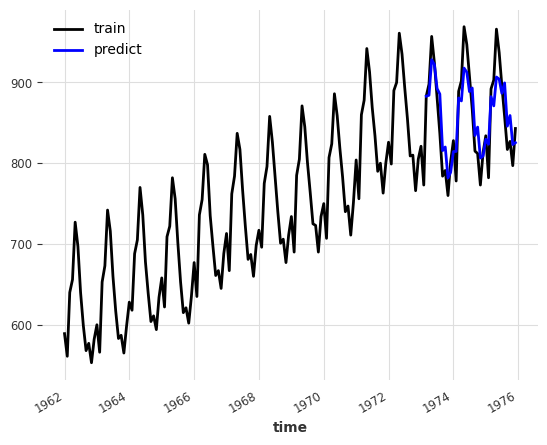

In [53]:
series.plot(label='train',color='black')
preds_undiff.plot(label='predict',color='blue')

In [55]:

test_undiff = series[cut_off:]
rmse(test_undiff,preds_undiff)

28.584471865668476

In [56]:
model.fit(series_diff)

ARIMA(p=6, d=1, q=7, seasonal_order=(0, 0, 0, 0), trend=t, random_state=None, add_encoders=None)

In [64]:
final_preds = model.predict(n=12)

In [65]:
series_diff_pd = series_diff.pd_dataframe()
final_preds = final_preds.pd_dataframe()
final_preds_df = pd.concat([series_diff_pd,final_preds])

In [66]:
preds_ts = TimeSeries.from_dataframe(final_preds_df)


In [67]:
final= diff.inverse_transform(preds_ts)

In [68]:
final.pd_dataframe()

component,0
time,
1962-01-01,589.000000
1962-02-01,561.000000
1962-03-01,640.000000
1962-04-01,656.000000
1962-05-01,727.000000
...,...
1976-08-01,885.504650
1976-09-01,837.529846
1976-10-01,856.663191


In [69]:
len(series)

168